In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
path_to_ics209 = "C:\MIT\RA\data\ics209plus-wildfire"
reports_path = "ics209-plus-wf_incidents_1999to2020.csv"
df = pd.read_csv(os.path.join(path_to_ics209, reports_path), index_col=0)
df = df[df["START_YEAR"]>=2014]

C:\Users\benja\AppData\Local\Temp\ipykernel_14504\3455486550.py:3: DtypeWarning: Columns (7,13,16,17,18,19,20,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path_to_ics209, reports_path), index_col=0)


In [3]:
# will have: id, first date, poo
output_df = pd.DataFrame()

# Create features

## Identifier

In [3]:
assert df["INCIDENT_ID"].duplicated().sum() == 0
output_df["fire_id"] = df["INCIDENT_ID"]
output_df["id"] = df['INC_IDENTIFIER'].astype(int).astype(str)

NameError: name 'output_df' is not defined

In [ ]:
output_df["fire_id"].iloc[0].split("_")[1]

'2714022'

In [ ]:
output_df["test"] = output_df["fire_id"].apply(lambda x: x.split("_")[1] )

In [ ]:
(output_df["test"] != output_df['id']).sum()

0

: 

## First Date

In [4]:
final = pd.read_csv("../data/preprocessed/final_dataset.csv", index_col=0)
date_columns = [col for col in final.columns if pd.api.types.is_string_dtype(final[col])]
date_like_columns = []

for col in date_columns:
    try:
        _ = pd.to_datetime(final[col], errors='raise')
        date_like_columns.append(col)
    except ValueError:
        continue
df_dates = final[date_like_columns]
print(df_dates)

C:\Users\benja\AppData\Local\Temp\ipykernel_14504\1058149737.py:1: DtypeWarning: Columns (20,52,54,60,61,91,143) have mixed types. Specify dtype option on import or set low_memory=False.
  final = pd.read_csv("../data/preprocessed/final_dataset.csv", index_col=0)
C:\Users\benja\AppData\Local\Temp\ipykernel_14504\1058149737.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _ = pd.to_datetime(final[col], errors='raise')
C:\Users\benja\AppData\Local\Temp\ipykernel_14504\1058149737.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _ = pd.to_datetime(final[col], errors='raise')
C:\Users\benja\AppData\Local\Temp\ipykernel_14504\1058149737.py:7: UserWarning: Could not infer format, so each element will be parsed i

          DISCOVERY_DATE REPORT_FROM_DATE   REPORT_TO_DATE  \
Colonne1                                                     
120861     5/5/2015 9:30    5/5/2015 9:30   5/7/2015 11:00   
120862     5/5/2015 9:30   5/7/2015 11:00   5/8/2015 14:00   
120863     5/5/2015 9:30   5/8/2015 11:00   5/9/2015 14:00   
120864     5/5/2015 9:30   5/9/2015 15:00  5/11/2015 11:00   
120865    5/6/2015 20:30   5/6/2015 20:30   5/7/2015 18:00   
...                  ...              ...              ...   
165041    6/9/2018 19:25   6/9/2018 19:30  6/10/2018 18:00   
165042    6/9/2018 19:25   6/11/2018 7:00  6/11/2018 16:15   
165043    6/9/2018 19:25  6/11/2018 19:00  6/12/2018 16:00   
165044    6/9/2018 19:25  6/12/2018 16:00  6/13/2018 15:00   
165045    6/9/2018 19:25  6/13/2018 15:00  6/14/2018 16:00   

                 CREATED_DATE   LAST_MODIFIED_DATE  
Colonne1                                            
120861    2015-05-11 13:45:28  2015-06-03 16:47:25  
120862    2015-05-11 13:45:28  201

C:\Users\benja\AppData\Local\Temp\ipykernel_14504\1058149737.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _ = pd.to_datetime(final[col], errors='raise')
C:\Users\benja\AppData\Local\Temp\ipykernel_14504\1058149737.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _ = pd.to_datetime(final[col], errors='raise')


In [5]:
final['DISCOVERY_DATE'] = pd.to_datetime(final['DISCOVERY_DATE'])
final['REPORT_FROM_DATE'] = pd.to_datetime(final['REPORT_FROM_DATE'])

In [6]:
grouped_serie = final.groupby("INCIDENT_ID")
disco_diffs = grouped_serie.apply(lambda x: np.abs(x['DISCOVERY_DATE'].min()-x['DISCOVERY_DATE'].max()))
disco_diffs = disco_diffs[disco_diffs.dt.total_seconds()>0]
disco_diffs_days = disco_diffs.dt.total_seconds() / (3600 * 24)

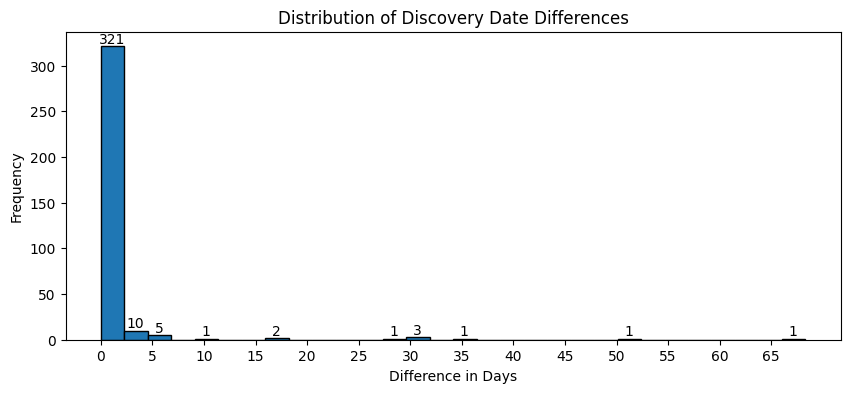

In [7]:
fig, ax = plt.subplots(figsize=(10, 4))
counts, bins, patches = ax.hist(disco_diffs_days, bins=30, edgecolor='k')

for count, bin, patch in zip(counts, bins, patches):
    if count>0:
      height = patch.get_height()
      ax.annotate(f'{int(count)}',
                  xy=(bin, height),
                  xytext=(8, 0),
                  textcoords="offset points",
                  ha='center',
                  va='bottom')

plt.xlabel('Difference in Days')
plt.ylabel('Frequency')
plt.title('Distribution of Discovery Date Differences')
plt.xticks(np.arange(min(disco_diffs_days), max(disco_diffs_days) + 1, step=5))
plt.show()

In [8]:
disco_diffs.sort_values().iloc[-1]

Timedelta('68 days 07:36:00')

In [9]:
disco_diffs.sort_values(ascending=False)

INCIDENT_ID
2015_2858198_BEAR LAKE             68 days 07:36:00
2018_9080368_HWY 97 & MP 37        51 days 21:56:00
2016_4295998_GLEASON               35 days 00:00:00
2016_4300226_BOX SPRINGS ROAD      31 days 00:00:00
2015_2766495_PARADISE              30 days 23:00:00
                                         ...       
2017_7134172_ALAMO                  0 days 00:01:00
2018_9058300_ARCHER CITY COMPLEX    0 days 00:01:00
2016_4385912_WEIGH STATION          0 days 00:01:00
2017_7233781_MM19                   0 days 00:01:00
2015_2714466_BOLGEN CREEK           0 days 00:01:00
Length: 346, dtype: timedelta64[ns]

In [10]:
biggest_difference = disco_diffs.sort_values(ascending=False).index[1]
study = final[final['INCIDENT_ID']==biggest_difference][['INCIDENT_ID', 'DISCOVERY_DATE', 'REPORT_FROM_DATE', 'REPORT_TO_DATE', 'ACRES', 'EST_IM_COST_TO_DATE']]
study.merge(df[['INCIDENT_ID', 'DISCOVERY_DATE']], on="INCIDENT_ID")

,INCIDENT_ID,DISCOVERY_DATE_x,REPORT_FROM_DATE,REPORT_TO_DATE,ACRES,EST_IM_COST_TO_DATE,DISCOVERY_DATE_y
0,2018_9080368_HWY 97 & MP 37,2018-07-14 11:41:00,2018-07-14 11:45:00,7/15/2018 20:00,630.0,150000.0,2018-05-23 13:45:00
1,2018_9080368_HWY 97 & MP 37,2018-07-14 11:41:00,2018-07-16 10:30:00,7/16/2018 19:00,630.0,300000.0,2018-05-23 13:45:00
2,2018_9080368_HWY 97 & MP 37,2018-07-14 11:41:00,2018-07-16 20:15:00,7/17/2018 16:00,630.0,355000.0,2018-05-23 13:45:00
3,2018_9080368_HWY 97 & MP 37,2018-05-23 13:45:00,2018-07-23 10:00:00,7/23/2018 13:45,763.0,500000.0,2018-05-23 13:45:00


weird things happen: we would want to take the smallest discovery date (as done by ics-data-plus) but this leads to weird results=> for example, index = 1 leads to a discovery date two months before the report
we want data that goes along the reports

we will take the first report date

In [11]:
start_dates = final.groupby('INCIDENT_ID')['REPORT_FROM_DATE'].min().rename("start_date")
old_df = output_df.copy()

NameError: name 'output_df' is not defined

In [ ]:
output_df = old_df.merge(start_dates, left_on="fire_id", right_index=True)
output_df

,fire_id,start_date
24422,2015_2714022_BAYLE MOUNTAIN,2015-05-05 09:30:00
24423,2015_2714081_BOOT COVE FIRE,2015-05-06 20:30:00
24424,2015_2714132_GUM TREE ROAD,2015-05-06 12:15:00
24426,2015_2714194_TRAILS END FIRE,2015-05-04 13:00:00
24427,2015_2714215_ATHENS,2015-04-30 15:00:00
...,...,...
32035,2018_9275593_HORSESHOE,2018-06-09 16:30:00
32036,2018_9275620_BOCCO,2018-06-09 16:00:00
32037,2018_9275808_RIM,2018-06-09 20:00:00
32038,2018_9275891_CHROME,2018-06-09 16:45:00


## POO

                            OLS Regression Results                            
Dep. Variable:     LRGST_FOD_LATITUDE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.531e+07
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:34:35   Log-Likelihood:                 4907.9
No. Observations:                9451   AIC:                            -9812.
Df Residuals:                    9449   BIC:                            -9798.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0024      0.007      0.344   

Text(3.03, 69.679, '$R^2$: 1.00')

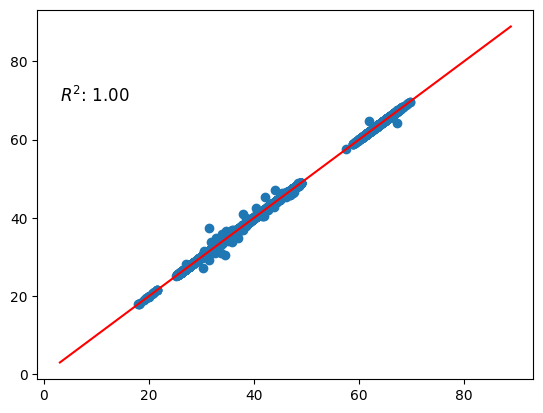

In [12]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

subdf=df.dropna(subset=['POO_LATITUDE', 'LRGST_FOD_LATITUDE'])
plt.scatter(subdf['POO_LATITUDE'], subdf['LRGST_FOD_LATITUDE'])
X = subdf['POO_LATITUDE']
y = subdf['LRGST_FOD_LATITUDE']
X = sm.add_constant(X)

# Step 4: Fit the OLS regression model
model = sm.OLS(y, X).fit()
X_pred = pd.DataFrame({'POO_LATITUDE': np.linspace(df['POO_LATITUDE'].min(), df['POO_LATITUDE'].max(), 100)})
X_pred = sm.add_constant(X_pred)
y_pred = model.predict(X_pred)
plt.plot(X_pred['POO_LATITUDE'], y_pred, color='red', label='Regression Line')
print(model.summary())
plt.text(df['POO_LATITUDE'].min(), max(df['LRGST_FOD_LATITUDE']), f'$R^2$: {model.rsquared:.2f}', fontsize=12)

In [16]:
output_df

NameError: name 'output_df' is not defined

In [ ]:
result = output_df.merge(df[['POO_LATITUDE', 'POO_LONGITUDE', 'INCIDENT_ID']], left_on="fire_id", right_on="INCIDENT_ID")
result = result.drop(columns="INCIDENT_ID")
result = result.rename(columns={"POO_LATITUDE": "poo_lat", "POO_LONGITUDE": "poo_lon"})
print("Dropping:")
print(result[result.isna().any(axis=1)])
result = result[~result.isna().any(axis=1)]
result.head()

Dropping:
                               fire_id          start_date  poo_lat  poo_lon  \
731   2015_2847392_SMITH RIVER COMPLEX 2015-06-09 06:30:00      NaN      NaN   
2447                2016_4420744_SERPA 2016-07-22 01:00:00      NaN      NaN   

                           INCIDENT_ID  
731   2015_2847392_SMITH RIVER COMPLEX  
2447                2016_4420744_SERPA  


,fire_id,start_date,poo_lat,poo_lon,INCIDENT_ID
0,2015_2714022_BAYLE MOUNTAIN,2015-05-05 09:30:00,43.78,-71.25,2015_2714022_BAYLE MOUNTAIN
1,2015_2714081_BOOT COVE FIRE,2015-05-06 20:30:00,44.79,-67.01,2015_2714081_BOOT COVE FIRE
2,2015_2714132_GUM TREE ROAD,2015-05-06 12:15:00,34.97,-80.01,2015_2714132_GUM TREE ROAD
3,2015_2714194_TRAILS END FIRE,2015-05-04 13:00:00,46.30,-92.49,2015_2714194_TRAILS END FIRE
4,2015_2714215_ATHENS,2015-04-30 15:00:00,31.91,-89.88,2015_2714215_ATHENS


## End Date

<Axes: ylabel='Frequency'>

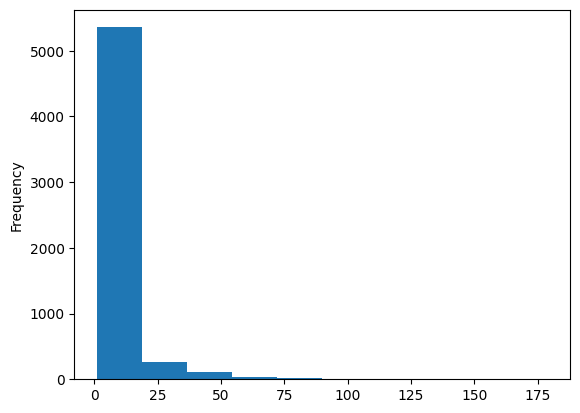

In [ ]:
final.groupby("INCIDENT_ID").size().plot(kind="hist")

In [ ]:
qtile = 0.90
alpha = final.groupby("INCIDENT_ID").size().quantile(qtile)
filtered_df = final.groupby("INCIDENT_ID").filter(lambda x: len(x) > 15)

In [ ]:
from tqdm import tqdm
nb_reports = []
alphas = []
fires_cropped = []
for qtile in tqdm(np.linspace(0, 1, 100)):
  alpha = final.groupby("INCIDENT_ID").size().quantile(qtile)
  alphas.append(alpha)
  nb_report = len(final.groupby("INCIDENT_ID").filter(lambda x: len(x) < alpha))
  fire_cropped = final.groupby("INCIDENT_ID").filter(lambda x: len(x) > alpha)["INCIDENT_ID"].nunique()
  fires_cropped.append(fire_cropped)
  nb_reports.append(nb_report)


 16%|█▌        | 16/100 [00:13<01:08,  1.22it/s]


KeyboardInterrupt: 

In [ ]:
alphas = []
for qtile in np.linspace(0, 1, 100):
  alpha = final.groupby("INCIDENT_ID").size().quantile(qtile)
  alphas.append(alpha)


Text(0.5, 0, 'Qtile')

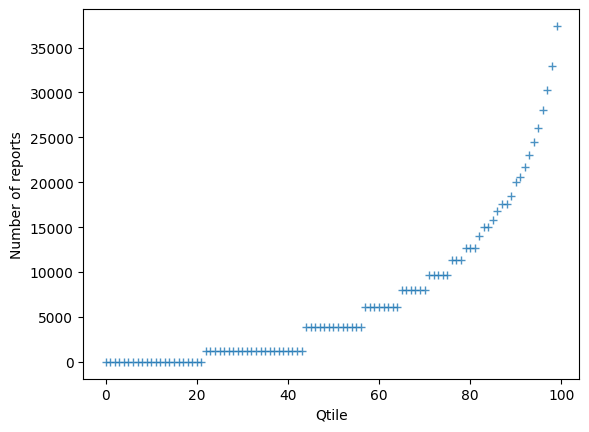

In [ ]:
plt.plot(nb_reports, linestyle='None', marker="+", alpha=0.8)
plt.ylabel("Number of reports")
plt.xlabel("Qtile")

Text(0.5, 0, 'Qtile')

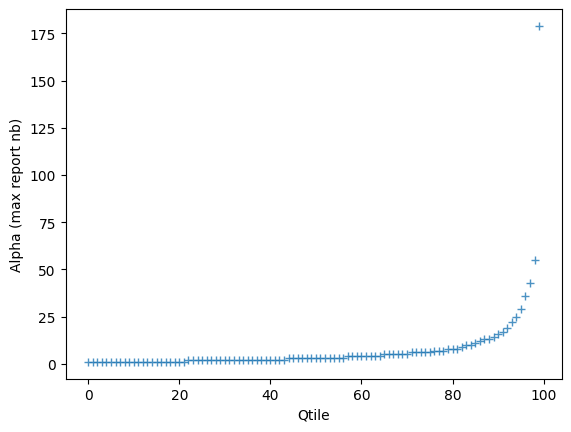

In [ ]:
plt.plot(alphas, linestyle='None', marker="+", alpha=0.8)
plt.ylabel("Alpha (max report nb)")
plt.xlabel("Qtile")

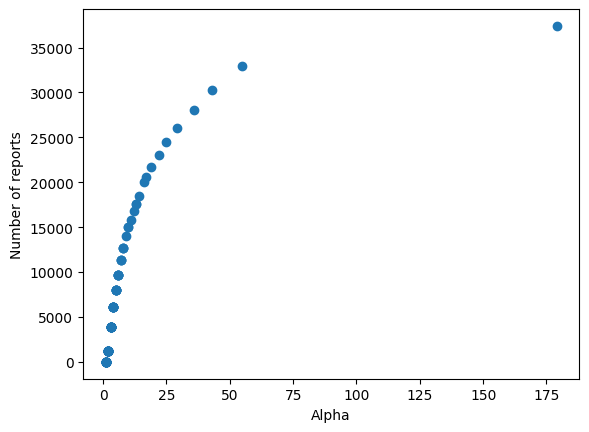

In [ ]:
fig = plt.figure()
plt.scatter(alphas, nb_reports)
plt.xlabel("Alpha")
plt.ylabel("Number of reports");

In [ ]:
20*final['INCIDENT_ID'].nunique()

115740

In [14]:
len(final)

37588

## Last date
How long should we look each fire. This is a tough question. 

LOooking at the previous study, I think that the first 20 days from report are enough to know if the fire will become super dangerous.
Looking at fire that grow big on the dashboard confirms it is ok.

In [15]:
from datetime import timedelta
result['end_date'] = result['start_date'] + timedelta(days=20)

NameError: name 'result' is not defined

In [21]:
result

,fire_id,start_date,poo_lat,poo_lon,end_date
0,2015_2714022_BAYLE MOUNTAIN,2015-05-05 09:30:00,43.78,-71.25,2015-05-25 09:30:00
1,2015_2714081_BOOT COVE FIRE,2015-05-06 20:30:00,44.79,-67.01,2015-05-26 20:30:00
2,2015_2714132_GUM TREE ROAD,2015-05-06 12:15:00,34.97,-80.01,2015-05-26 12:15:00
3,2015_2714194_TRAILS END FIRE,2015-05-04 13:00:00,46.30,-92.49,2015-05-24 13:00:00
4,2015_2714215_ATHENS,2015-04-30 15:00:00,31.91,-89.88,2015-05-20 15:00:00
...,...,...,...,...,...
5780,2018_9275593_HORSESHOE,2018-06-09 16:30:00,40.59,-112.71,2018-06-29 16:30:00
5781,2018_9275620_BOCCO,2018-06-09 16:00:00,39.74,-106.70,2018-06-29 16:00:00
5782,2018_9275808_RIM,2018-06-09 20:00:00,42.68,-112.99,2018-06-29 20:00:00
5783,2018_9275891_CHROME,2018-06-09 16:45:00,39.66,-122.53,2018-06-29 16:45:00


In [29]:
result[['fire_id', 'start_date', 'end_date', 'poo_lat', 'poo_lon']].to_csv('../data/preprocessed/request_data.csv')

# Bbox

<Axes: ylabel='Frequency'>

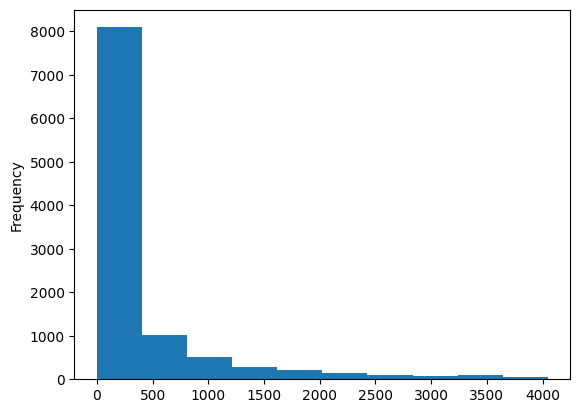

In [36]:
(df[df['FINAL_ACRES']<=10000]['FINAL_ACRES']/2.471).plot(kind="hist")

In [38]:
64*64*20*1000*10*16

13107200000